In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [4]:
df = pd.read_csv('spambase.csv', header = 0)
print(len(df.axes[0]))
print(len(df.axes[1]))
df.head()
print(df.columns)

4600
58
Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38',
       '0.39', '0.40', '0.41', '0.42', '0.43', '0.778', '0.44', '0.45',
       '3.756', '61', '278', '1'],
      dtype='object')


In [5]:
# remove duplicates and verify
df = df.drop_duplicates()
df[df.duplicated()]

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1


In [6]:
# check for null values
df.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.43      0
0.778     0
0.44      0
0.45      0
3.756     0
61        0
278       0
1         0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)

PCA(n_components=2)

In [9]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(4209, 58)
(4209, 2)


Text(0, 0.5, 'Second Principal component')

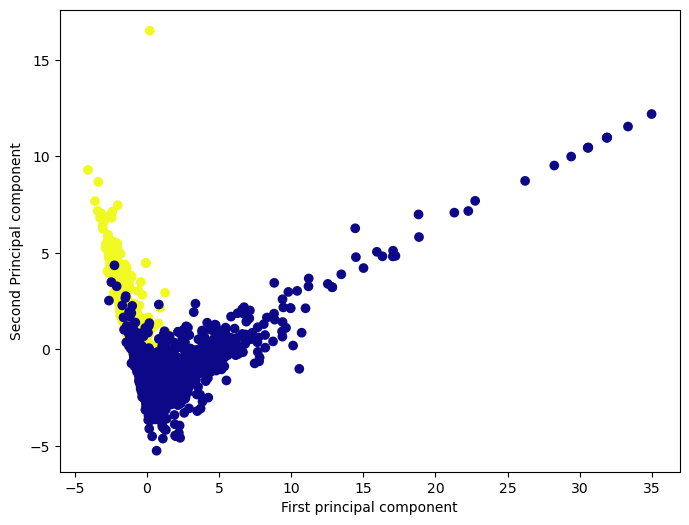

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['1'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal component')

In [11]:
pca.components_

array([[-0.05219559, -0.02528353, -0.05858461, -0.0082537 , -0.04905404,
        -0.05784444, -0.06569594, -0.04732123, -0.06172783, -0.03208942,
        -0.0692633 , -0.023097  , -0.04628559, -0.02204655, -0.0428114 ,
        -0.06027422, -0.06425124, -0.03005902, -0.10261534, -0.04288799,
        -0.10148896, -0.01895894, -0.07353346, -0.05408246,  0.21122745,
         0.20599416,  0.08857372,  0.26515272,  0.20619938,  0.29225573,
         0.29426495,  0.33639386,  0.01318701,  0.33519724,  0.25198489,
         0.30149035,  0.06406057, -0.0004052 ,  0.04808646,  0.30339106,
         0.01912841,  0.03265465,  0.08063663,  0.01864538,  0.0201452 ,
         0.0057749 ,  0.00525006,  0.00928561,  0.00127809,  0.13063818,
         0.02601039, -0.05885936, -0.07358067, -0.00516757, -0.02551469,
        -0.0437054 , -0.05888985, -0.16243259],
       [ 0.11984422,  0.09668946,  0.12553962,  0.01307984,  0.11375234,
         0.13336782,  0.15377857,  0.12520338,  0.19422634,  0.13911545,
   

Decision Tree

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [13]:
X = df.values[:, :-1]
Y = df.values[:,-1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 3)

In [15]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",
                                     max_depth=4)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [16]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0.

In [17]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred_en)
print (cm)

[[457  35]
 [ 67 283]]


In [18]:
print ("Accuracy is "), accuracy_score(y_test,y_pred_en)*100

Accuracy is 


(None, 87.88598574821853)

In [19]:
print(classification_report(y_test,y_pred_en))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       492
         1.0       0.89      0.81      0.85       350

    accuracy                           0.88       842
   macro avg       0.88      0.87      0.87       842
weighted avg       0.88      0.88      0.88       842

